Find the most highly categorised data in the dataset

In [1]:
import sys
!{sys.executable} -m pip install torch torchvision scipy matplotlib | grep -v 'already satisfied'


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from scipy.io import loadmat
import numpy as np
import pathlib

# nasty import hack - this is a code smell, work out how to remove it
import sys
sys.path.append('../')

In [3]:
# def load_mf_softmax():
#     basepath = pathlib.Path("/Volumes/Data/mf_alexnet_softmax")

#     paths = basepath.glob("*.mat")
#     paths = sorted(paths, key=lambda p: int(p.stem))
#     encodings = [loadmat(p)["features"] for p in paths]
#     encodings = np.concatenate(encodings)
#     return encodings

In [4]:
# Download ImageNet labels

! if [ -f "imagenet_classes.txt" ]; then echo "File imagenet_classes.txt already exists"; else wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt 2> /dev/null; fi


File imagenet_classes.txt already exists


In [5]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [6]:
from pathlib import Path
# Load the softmax encodings of the data

from simcoder.similarity import load_mf_encodings

smData = load_mf_encodings(Path('/Volumes/Data/mf_alexnet_softmax'))

# Load the data

allData = load_mf_encodings(Path("/Volumes/Data/mf_resnet50")) # load resnet 50 encodings

In [7]:
from simcoder.count_cats import findHighlyCategorisedInDataset
from simcoder.count_cats import countNumberinCatGTThresh

threshold = 0.95

top_cats, counts  = findHighlyCategorisedInDataset(smData,threshold)


In [13]:

for i in range(20):
    print( top_cats[i], counts[i], categories[top_cats[i]], countNumberinCatGTThresh(top_cats[i],threshold,smData) )

985 2208 daisy 2208
984 596 rapeseed 596
425 489 barn 489
759 483 reflex camera 483
309 459 bee 459
483 444 castle 444
97 428 drake 428
291 420 lion 420
565 408 freight car 408
989 381 hip 381
107 330 jellyfish 330
916 317 web site 317
335 298 fox squirrel 298
980 293 volcano 293
323 275 monarch 275
340 266 zebra 266
404 261 airliner 261
284 259 Siamese cat 259
84 255 peacock 255
388 254 giant panda 254


In [14]:
from simcoder.experiment import get_nth_categorical_query

top_caters = top_cats[0: 100]  # subset the top categories
print( categories[top_caters[0]] )
queries = get_nth_categorical_query(top_caters,smData,0)  # get one query in each category

from simcoder.similarity import get_mf_image

daisy


hip


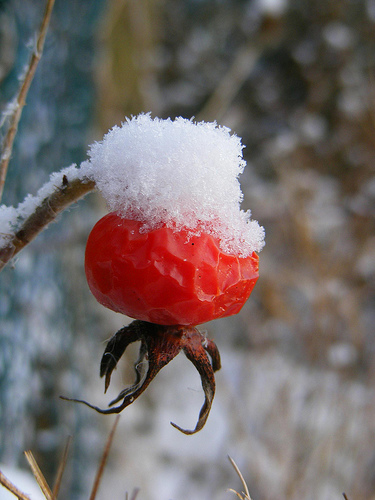

In [16]:
from simcoder.count_cats import get_topcat


q = queries[9]
found_cat = get_topcat(q,smData)
print( categories[found_cat] )
get_mf_image(q)